In [ ]:
"""
PRML MINOR PROJECT: Project4 ( Dataset: Retail )

    [ A company that sells some of the product, and you want to know how well the selling
    performance of the product. You have the data that we can analyze, but what kind of analysis can
    we do? Well, we can segment customers based on their buying behavior on the market. Your task
    is to classify the data into the possible types of customers which the retailer can encounter. ]

    Gaurav Naval B21EE020
    Garvit Gangwal B21EE019
    Abhaymani Singh B21EE001
"""

'\nPRML MINOR PROJECT: Project4 ( Dataset: Retail )\n\n    [ A company that sells some of the product, and you want to know how well the selling\n    performance of the product. You have the data that we can analyze, but what kind of analysis can\n    we do? Well, we can segment customers based on their buying behavior on the market. Your task\n    is to classify the data into the possible types of customers which the retailer can encounter. ]\n\n    Gaurav Naval B21EE020\n    Garvit Gangwal B21EE019\n    Abhaymani Singh B21EE001\n'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing necessary** **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import plotly.graph_objs as go
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import LabelEncoder
import plotly.offline as pyoff
from sklearn.decomposition import PCA

# Data Preprocessing

In [ ]:
# Importing The Dataset

Data = pd.read_excel('/content/Online Retail.xlsx')
Data.to_csv('Online Retail.csv', index=False)

Data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Calculating the missing values

Data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(Data.isnull().sum())/len(Data), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [ ]:
# Droping rows having missing values

Data = Data.dropna()
Data.shape

(406829, 8)

In [ ]:
# data info

Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
# data description

Data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Converting InvoiceDate to datetime and adding new columns of 'Date' , 'Month' and 'Year'

Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'])
Data['Date'] = Data['InvoiceDate'].dt.date
Data['Month'] = Data['InvoiceDate'].dt.month
Data['Year'] = Data['InvoiceDate'].dt.year
Data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,2011


In [ ]:
# remove the stockcode column
Data = Data.drop(columns=['StockCode'])

In [ ]:
# instantiate the label encoder
le = LabelEncoder()

# fit and transform the 'Country' column
Data['Country'] = le.fit_transform(Data['Country'])

In [ ]:
# Removing duplicates and negative values from Data

Data.drop_duplicates(inplace=True)
Data = Data[(Data['Quantity'] > 0) & (Data['UnitPrice'] > 0)]
Data

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,2010-12-01,12,2010
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,2010-12-01,12,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,2010-12-01,12,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,2010-12-01,12,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,2010-12-01,12,2010
...,...,...,...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,13,2011-12-09,12,2011
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,13,2011-12-09,12,2011
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,13,2011-12-09,12,2011
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,13,2011-12-09,12,2011


In [ ]:
#creating YearMonth field for the ease of reporting and visualization
Data['InvoiceYearMonth'] = Data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
Data['Revenue'] = Data['UnitPrice'] * Data['Quantity']

revenue = Data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
revenue['InvoiceYearMonth'] = revenue['InvoiceYearMonth'].astype(str).apply(lambda x: x[:4] + '-' + x[4:])
revenue

,InvoiceYearMonth,Revenue
0,2010-12,570368.230
1,2011-01,568067.710
2,2011-02,446082.420
3,2011-03,594059.260
4,2011-04,468369.331
5,2011-05,677333.350
6,2011-06,660044.800
7,2011-07,598959.151
8,2011-08,644041.040
9,2011-09,950673.952


# Data Visualisation

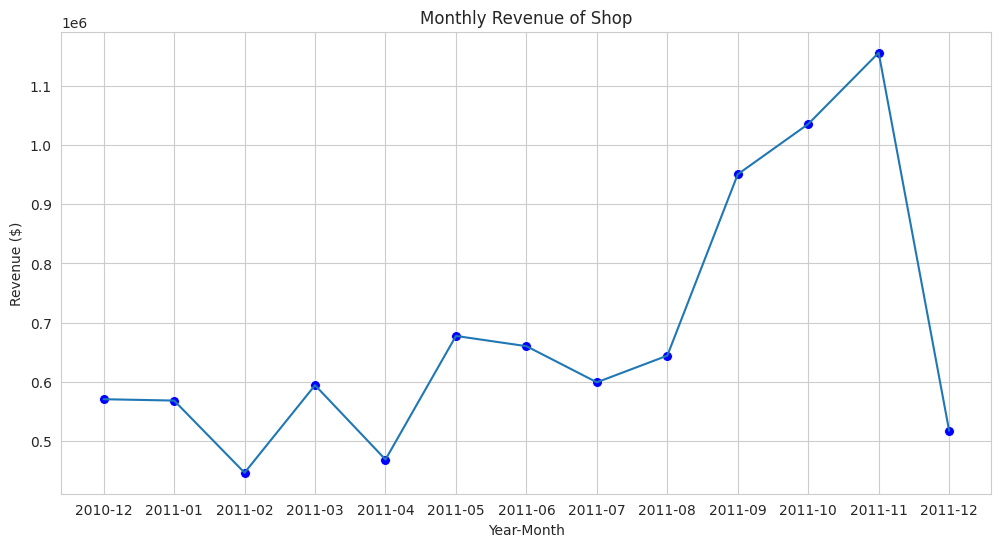

In [ ]:
# create scatter plot of monthly revenue
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.scatterplot(x='InvoiceYearMonth', y='Revenue', data=revenue, color='blue', s=50)
sns.lineplot(x='InvoiceYearMonth', y='Revenue', data=revenue)
plt.title('Monthly Revenue of Shop')
plt.xlabel('Year-Month')
plt.ylabel('Revenue ($)')
plt.show()

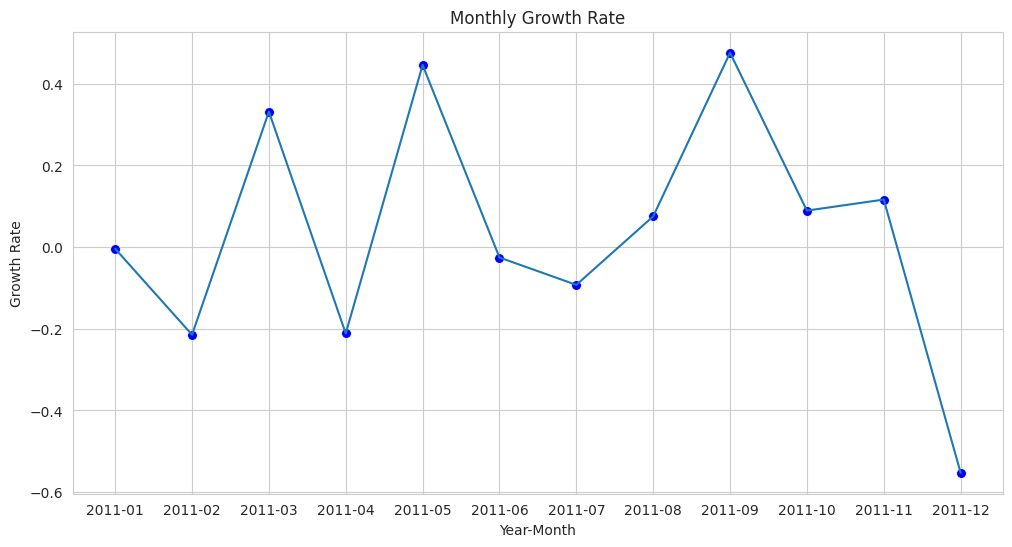

In [ ]:
# calculate monthly revenue and growth rate
revenue['MonthlyGrowth'] = revenue['Revenue'].pct_change()

# filter out the first month
revenue = revenue[revenue['InvoiceYearMonth'] != 201012]

# create scatter plot of monthly growth rate with hover effect
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
scatterplot = sns.scatterplot(x='InvoiceYearMonth', y='MonthlyGrowth', data=revenue, color='blue', s=50)
sns.lineplot(x='InvoiceYearMonth', y='MonthlyGrowth', data=revenue)
plt.title('Monthly Growth Rate')
plt.xlabel('Year-Month')
plt.ylabel('Growth Rate')
plt.show()

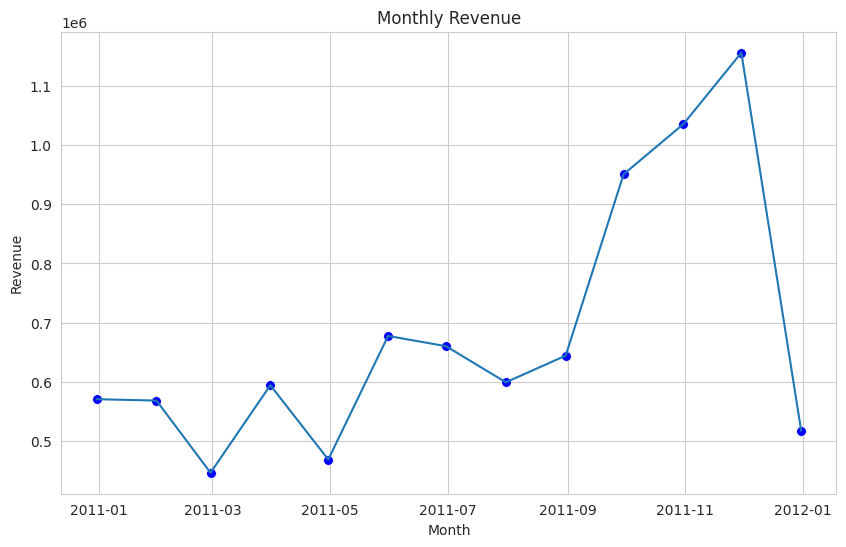

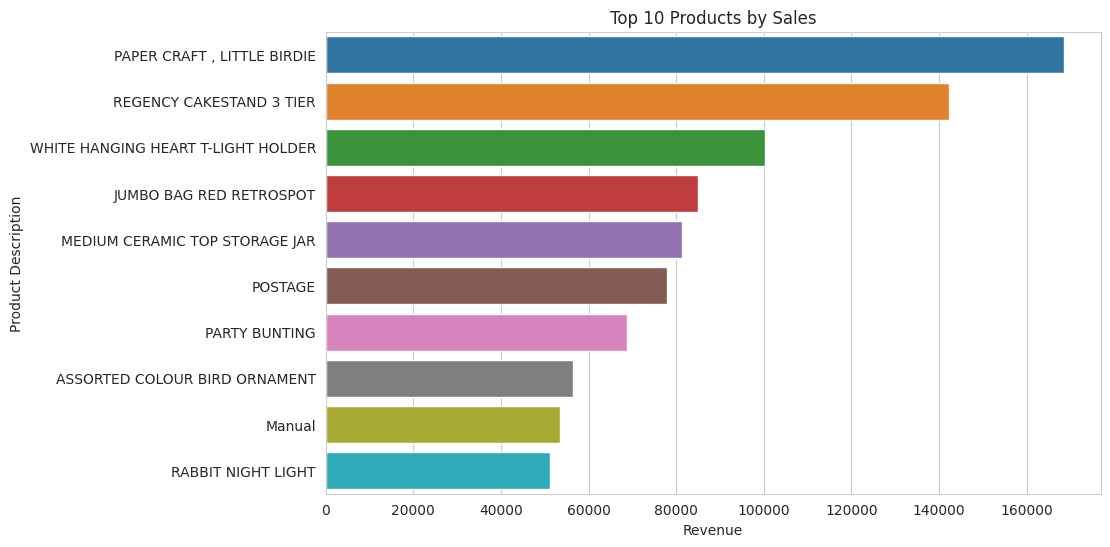

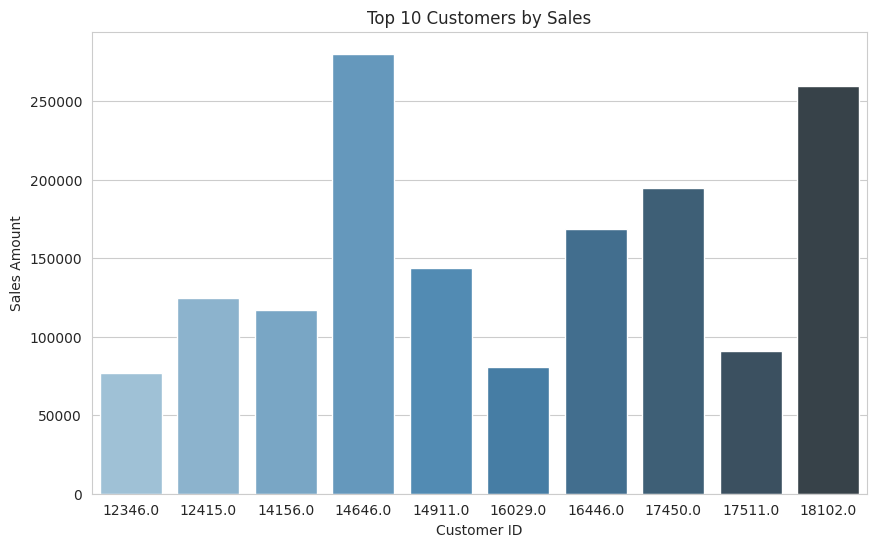

In [ ]:
# Monthly revenue analysis
monthly_revenue = Data.groupby(pd.Grouper(key='InvoiceDate', freq='M')).sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_revenue.index, y='Revenue', data=monthly_revenue)
sns.scatterplot(x=monthly_revenue.index, y='Revenue', data=monthly_revenue, color='blue', s=50)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# Top 10 products by sales
top_products = Data.groupby('Description').sum().sort_values(by='Revenue', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y=top_products.index, data=top_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.show()

# Top 10 customers by sales
top_customers = Data.groupby('CustomerID').sum().sort_values(by='Revenue', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.index,y='Revenue', data=top_customers, palette='Blues_d', dodge=0.5)
plt.title('Top 10 Customers by Sales')
plt.ylabel('Sales Amount')
plt.xlabel('Customer ID')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36')])

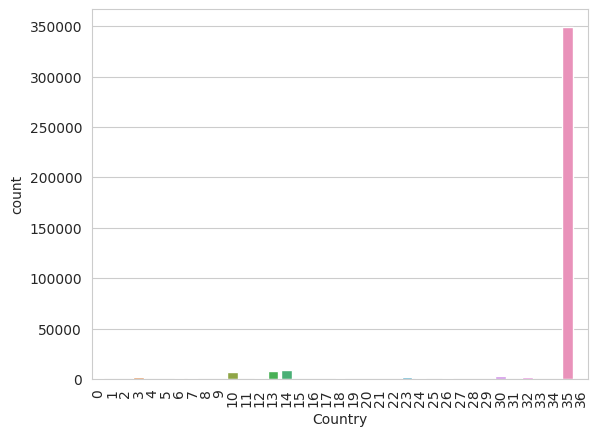

In [ ]:
# Creating count plot for 'Country'

sns.countplot(x='Country', data=Data)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Sales by Month')

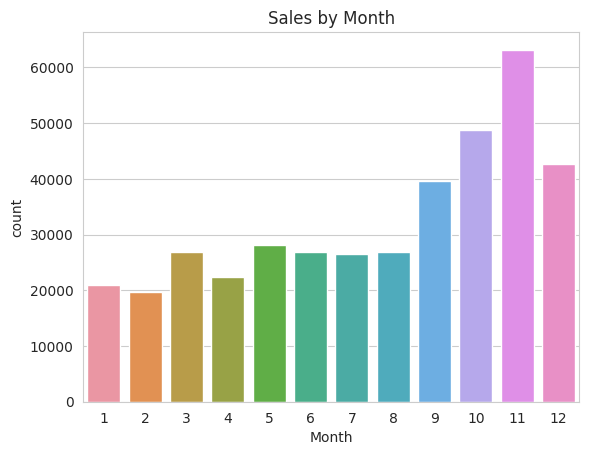

In [ ]:
# Creating count plot for 'Month'

sns.countplot(x='Month', data=Data)
plt.title('Sales by Month')

Text(0.5, 1.0, 'Sales by Year')

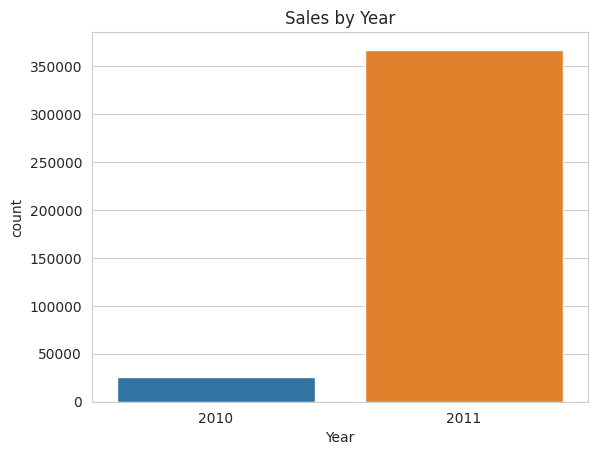

In [ ]:
# Creating count plot for 'Year'

sns.countplot(x='Year', data=Data)
plt.title('Sales by Year')

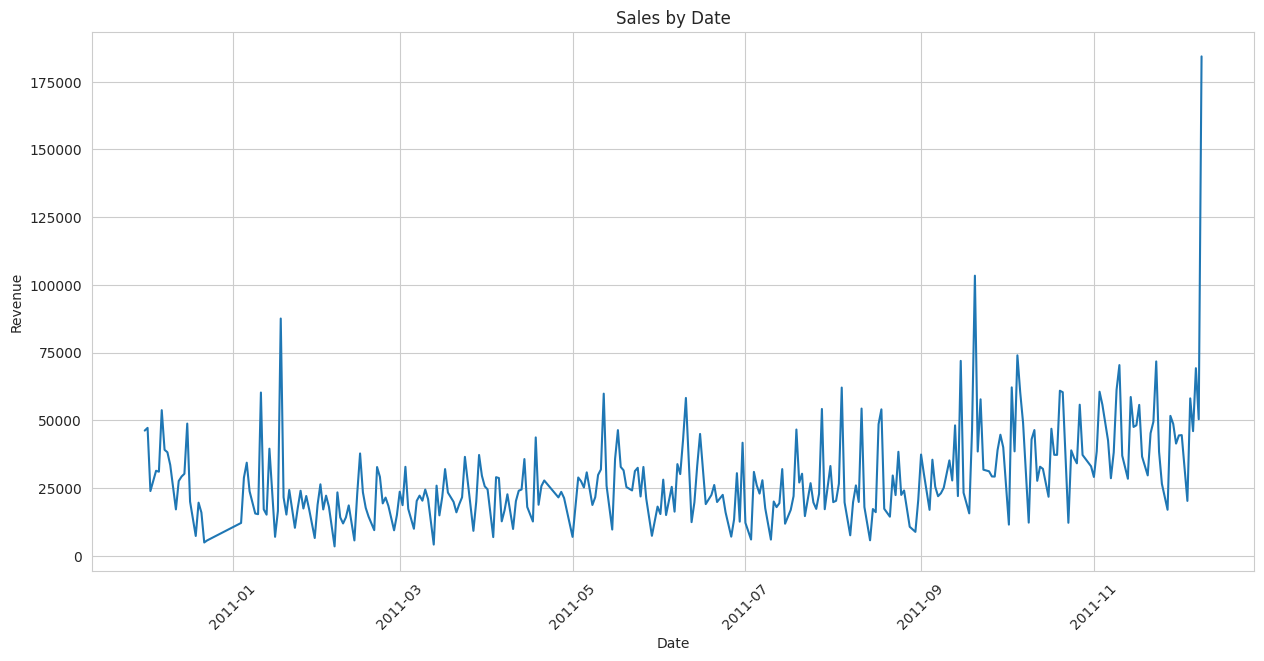

In [ ]:
# Group the data by date and calculate the sum of sales
sales_by_date = Data.groupby('Date')['Revenue'].sum().reset_index()

# Create the countplot
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Revenue', data=sales_by_date)
plt.title('Sales by Date')
plt.xticks(rotation=45)
plt.show()

# K-Means Clustering

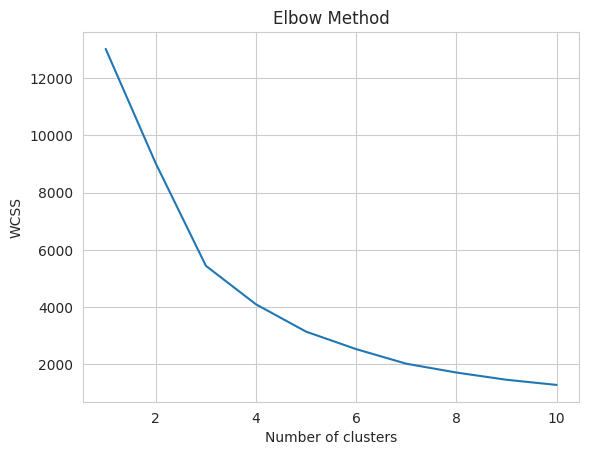

Silhouette score for optimal clusters is  0.895824525735306
Optimal number of clusters are  2


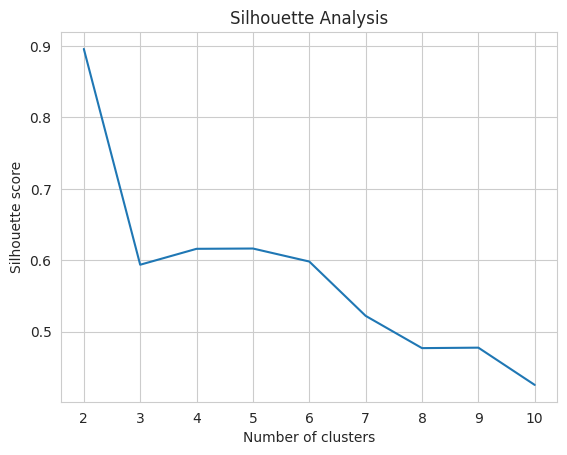

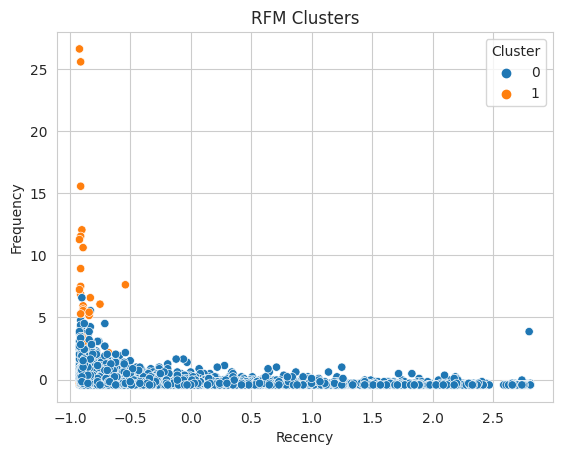

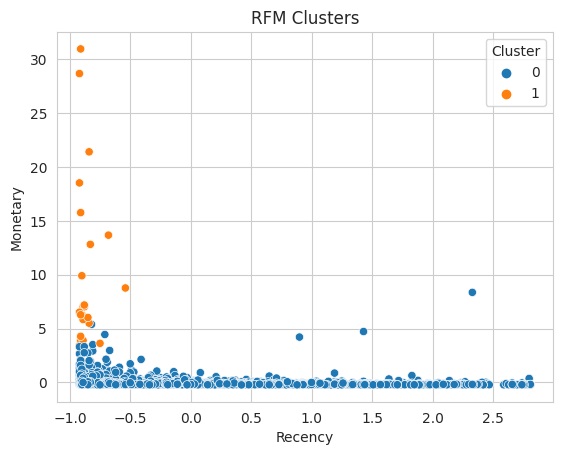

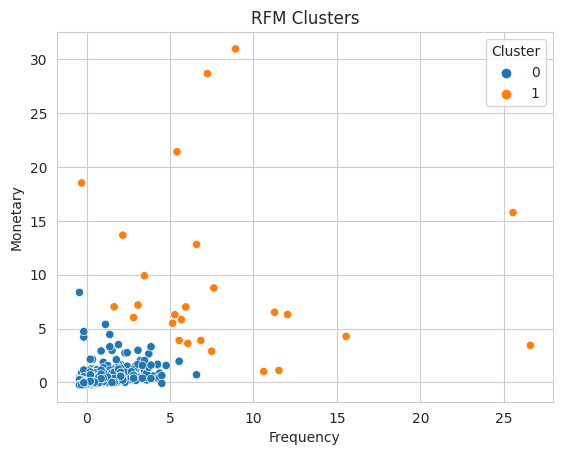

In [ ]:
# Clustering on the basis of RFM values

# Calculate RFM values for each customer
recency = Data.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (pd.to_datetime('2011-12-10') - x).days)
frequency = Data.groupby('CustomerID').nunique()['InvoiceNo']
monetary = Data.groupby('CustomerID').sum()['Revenue']

rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled
rfm_df = pd.DataFrame(rfm_scaled,columns = ['Recency', 'Frequency', 'Monetary'])

# Determine the optimal number of clusters using elbow method
wcss_new = []
for i in range(1, 11):
    kmeans_new = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_new.fit(rfm_scaled)
    wcss_new.append(kmeans_new.inertia_)

plt.plot(range(1, 11), wcss_new)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal number of clusters using Silhouette score
curr_new = 0
n_new=0
silhouette_scores_new=[]
for i in range(2, 11):
    kmeans0 = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans0.fit(rfm_scaled)
    score_new = silhouette_score(rfm_scaled, kmeans0.labels_)
    silhouette_scores_new.append(score_new)
    if score_new>curr_new:
        curr_new = score_new
        n_new=i

print("Silhouette score for optimal clusters is ",curr_new)
print("Optimal number of clusters are ",n_new)

# Train the KMeans model
kmeans_rfm = KMeans(n_clusters=n_new, init='k-means++', random_state=0)
kmeans_rfm.fit(rfm_scaled)

# Add cluster labels to the dataset
rfm_df['Cluster'] = kmeans_rfm.labels_

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores_new)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Visualize the clusters
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_df)
plt.title('RFM Clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_df)
plt.title('RFM Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm_df)
plt.title('RFM Clusters')
plt.ylabel('Monetary')
plt.xlabel('Frequency')
plt.show()

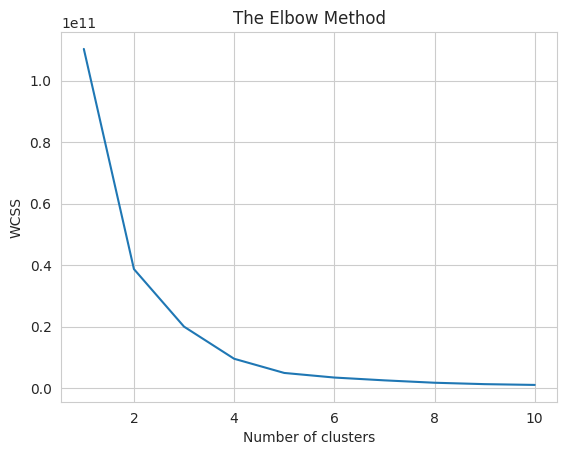

Silhouette score for optimal clusters is  0.9798281549326691
Best number of clusters are  2


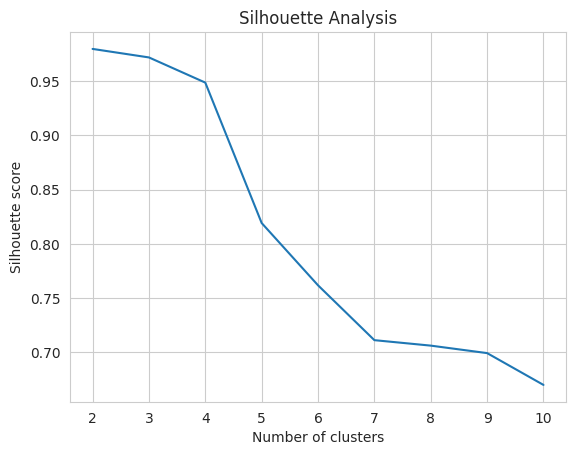

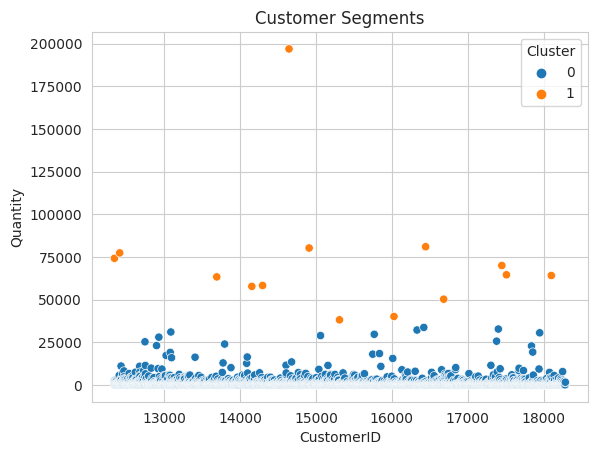

In [ ]:
#Clustering on the basis of quantity

# Extracting the relevant columns
data = Data[['CustomerID', 'Quantity']]

# Grouping data by customer ID and calculating the total quantity purchased
customer_data = data.groupby(['CustomerID']).agg({'Quantity': 'sum'})

# Creating an array of total quantity purchased
X = np.array(customer_data['Quantity'])

# Reshaping the array
X = X.reshape(-1, 1)

# Using the Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal number of clusters using Silhouette score
silhouette_scores = []
curr = 0
n=0
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    if score>curr:
        curr = score
        n=i

print("Silhouette score for optimal clusters is ",curr)
print("Best number of clusters are ",n)

# Creating the K-means classifier with the optimal number of clusters
kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42, max_iter=300)

# Fitting the data to the classifier
kmeans.fit(X)

# Adding the cluster labels to the customer data
customer_data['Cluster'] = kmeans.labels_

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Visualising the clusters
sns.scatterplot(x='CustomerID', y='Quantity', hue='Cluster', data=customer_data)
plt.title('Customer Segments')
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.show()



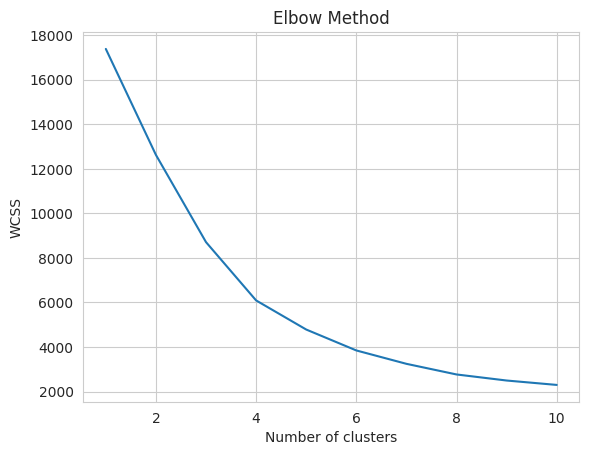

Silhouette score for optimal clusters is  0.9798281549326691
Best number of clusters are  2


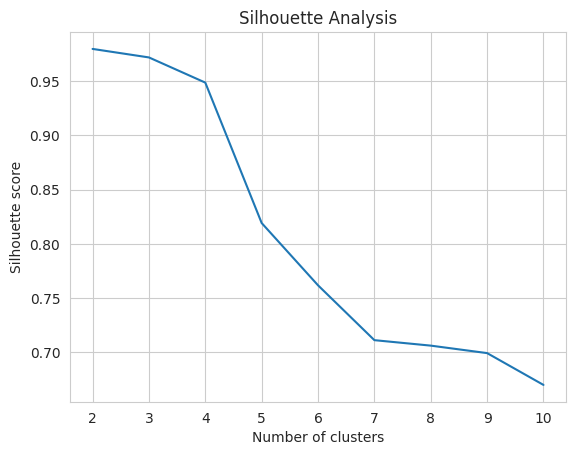

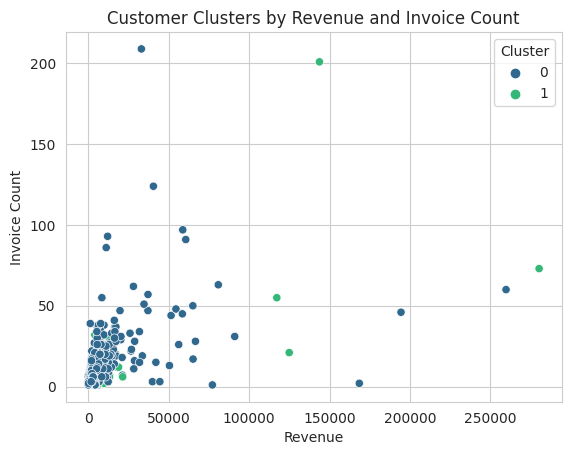

In [ ]:
# Extract necessary features
customer_data1 = Data.groupby(['CustomerID', 'Country']).agg({'InvoiceNo': 'nunique', 'Revenue': 'sum'}).reset_index()

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data1)

# Determine the optimal number of clusters using elbow method
wcss4 = []
for i in range(1, 11):
    kmeans4 = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans4.fit(customer_data_scaled)
    wcss4.append(kmeans4.inertia_)

plt.plot(range(1, 11), wcss4)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal number of clusters using Silhouette score
silhouette_scores11 = []
curr11 = 0
n11=0
for i in range(2, 11):
    kmeans11 = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans11.fit(X)
    score11 = silhouette_score(X, kmeans11.labels_)
    silhouette_scores11.append(score11)
    if score11>curr11:
        curr11 = score11
        n11=i

print("Silhouette score for optimal clusters is ",curr11)
print("Best number of clusters are ",n11)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores11)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Train the KMeans model
kmeans_country = KMeans(n_clusters=n11, init='k-means++', random_state=0)
kmeans_country.fit(customer_data_scaled)

# Add cluster labels to the dataset
customer_data1['Cluster'] = kmeans_country.labels_

# Visualize the clusters
sns.scatterplot(x='Revenue', y='InvoiceNo', hue='Cluster', data=customer_data1, palette='viridis')
plt.title('Customer Clusters by Revenue and Invoice Count')
plt.xlabel('Revenue')
plt.ylabel('Invoice Count')

plt.show()

# Hierarchial Clustering

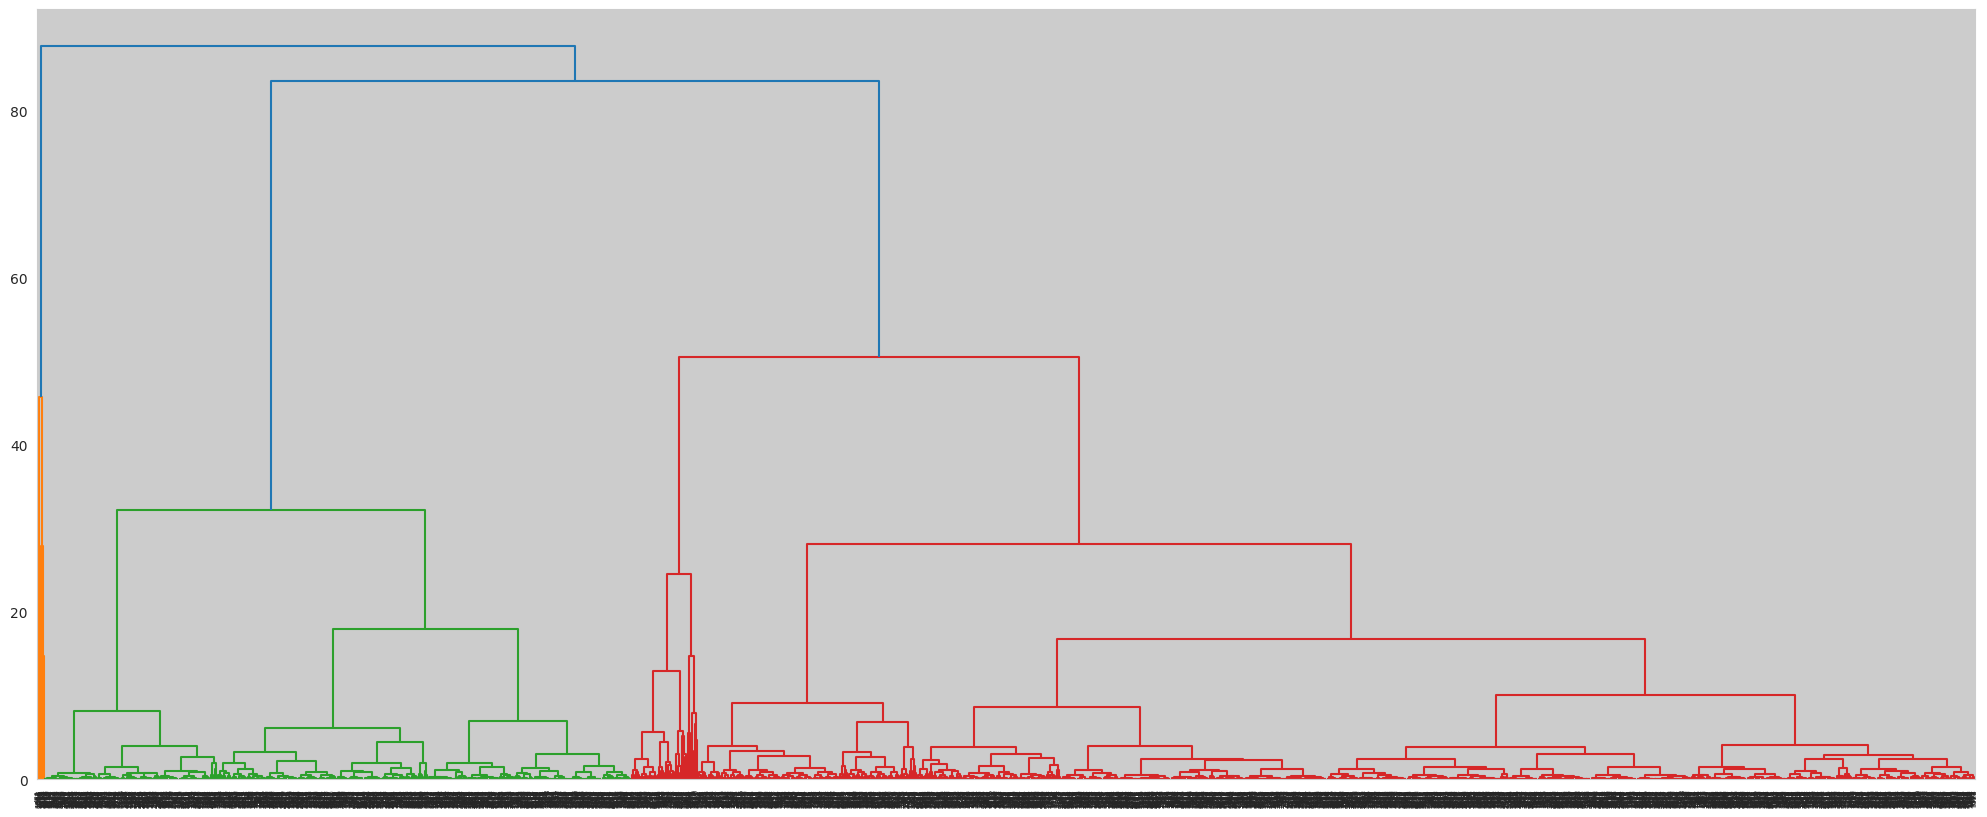

In [ ]:
# Hierarchial Clustering on the basis of RFM

# Compute the linkage matrix
Z = linkage(rfm_scaled, method='ward')

# Plot the dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

# Use fcluster to obtain cluster labels
from scipy.cluster.hierarchy import fcluster
max_d = 20
cluster_labels = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the dataset
rfm_df['Cluster'] = cluster_labels

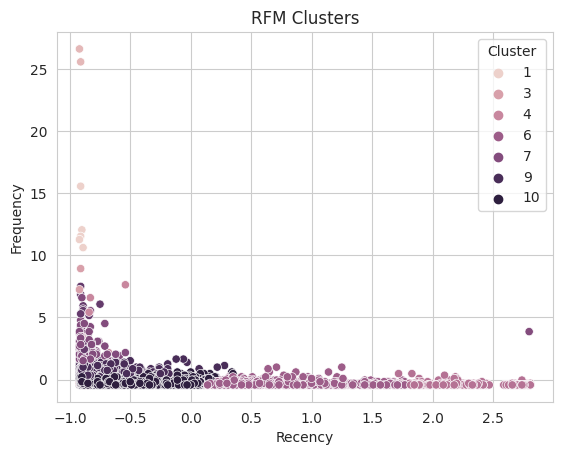

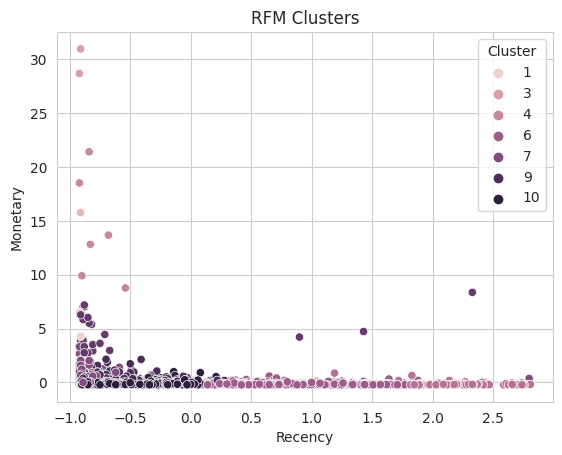

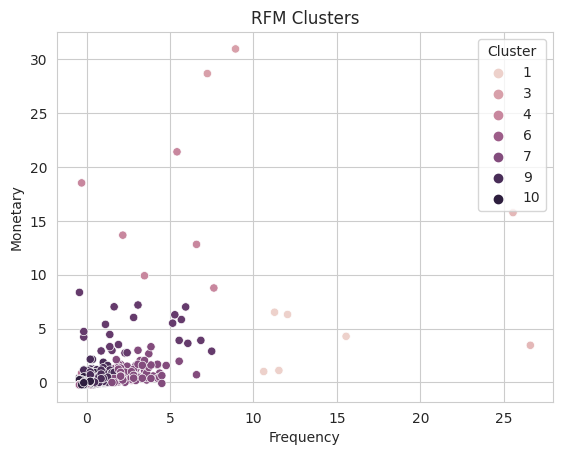

In [ ]:
# Hierarchial Clustering on the basis of RFM

# Visualize the clusters
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_df)
plt.title('RFM Clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_df)
plt.title('RFM Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm_df)
plt.title('RFM Clusters')
plt.ylabel('Monetary')
plt.xlabel('Frequency')
plt.show()


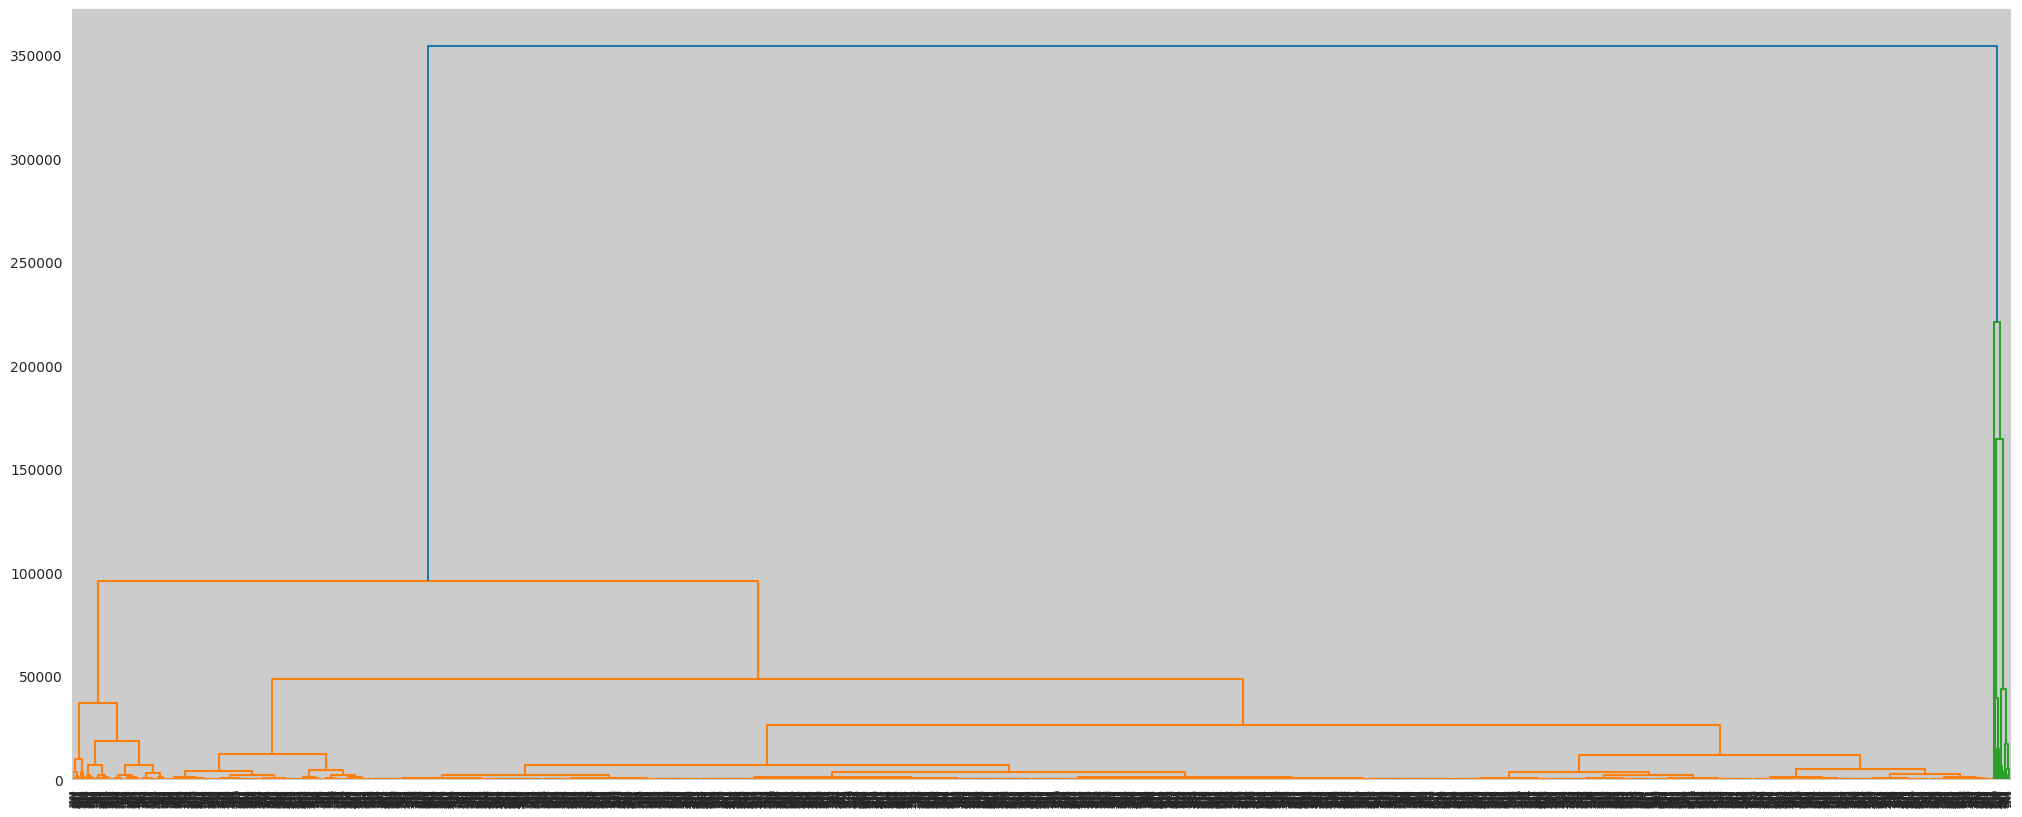

In [ ]:
# Hierarchial Clustering on the basis of 'Quantity'

# Compute the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

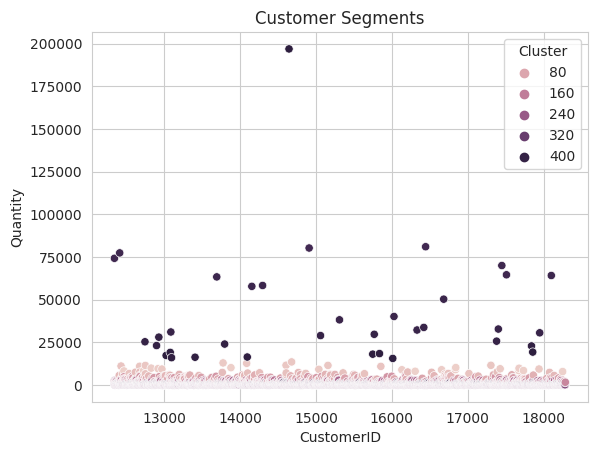

In [ ]:
# Hierarchial Clustering on the basis of 'Quantity'

# Use fcluster to obtain cluster labels
max_d = 20
cluster_labels = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the dataset
customer_data['Cluster'] = cluster_labels

# Visualize the clusters
sns.scatterplot(x='CustomerID', y='Quantity', hue='Cluster', data=customer_data)
plt.title('Customer Segments')
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.show()

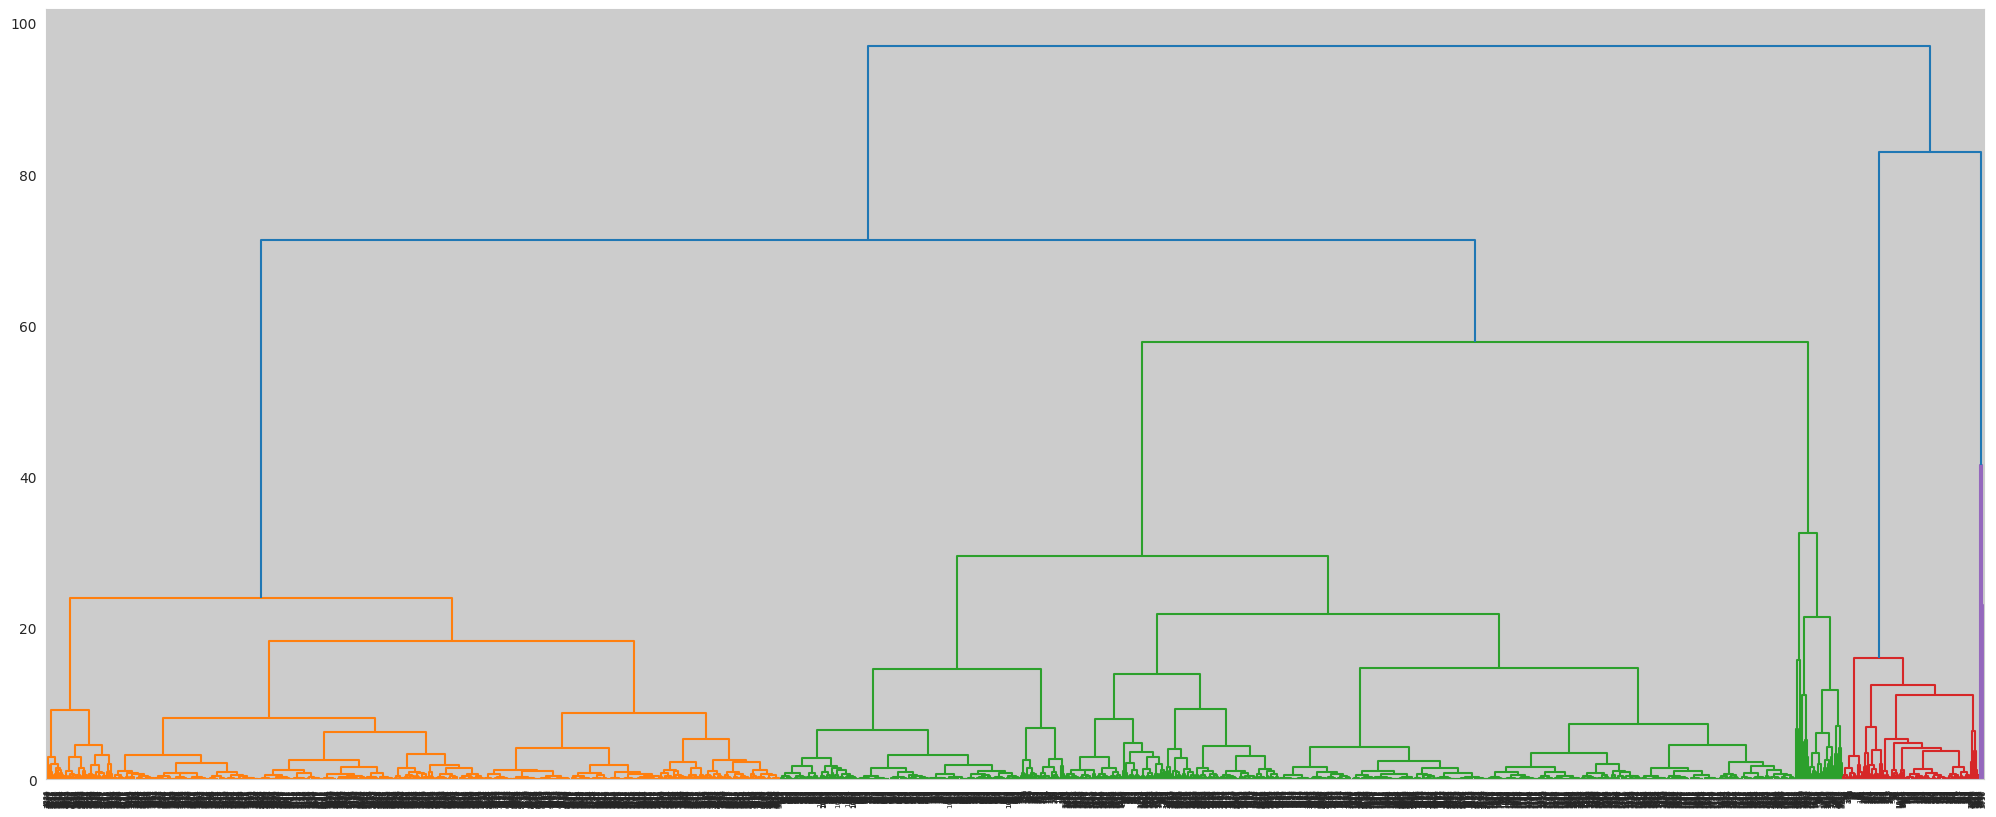

In [ ]:
# Hierarchial Clustering on the basis of 'Country'

# Compute the linkage matrix
Z = linkage(customer_data_scaled, method='ward')

# Plot the dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

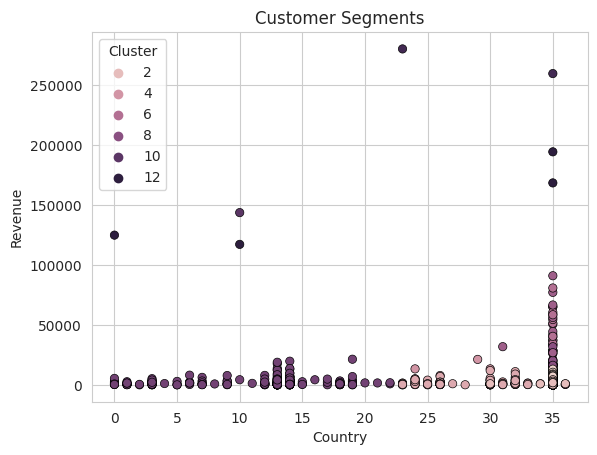

In [ ]:
# Hierarchial Clustering on the basis of 'Country'

# Use fcluster to obtain cluster labels
max_d = 20
cluster_labels = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the dataset
customer_data1['Cluster'] = cluster_labels

# Visualize the clusters
sns.scatterplot(x='Country', y='Revenue', hue='Cluster', data=customer_data1,edgecolor='k')
plt.title('Customer Segments')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

# Applying PCA

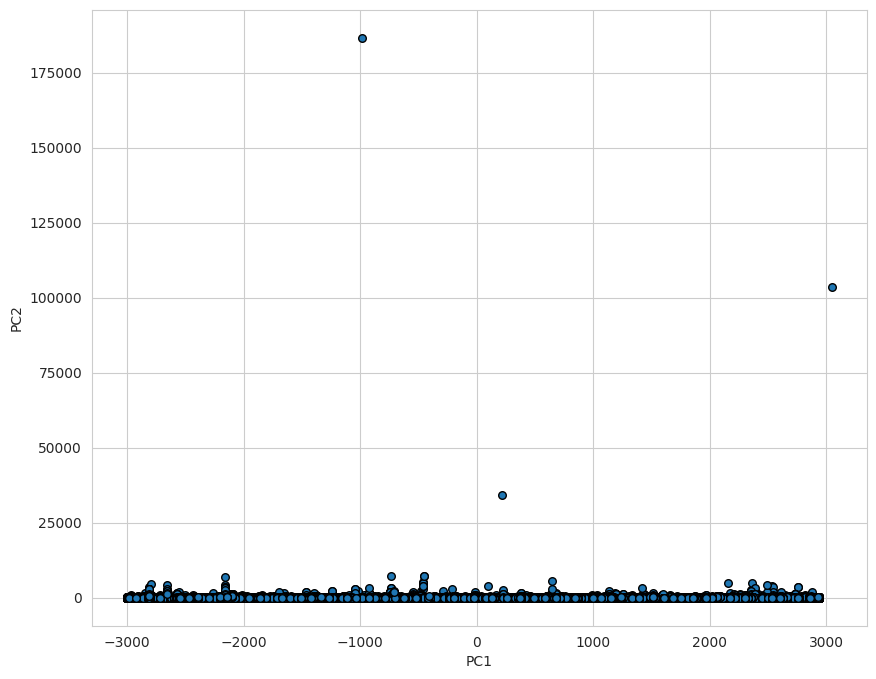

In [ ]:
# Scale the data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
relevant_features = ['Quantity', 'CustomerID', 'Revenue']

# Perform PCA
pca = PCA(n_components=2)
pca.fit(Data[relevant_features])
pca_data = pca.transform(Data[relevant_features])
df_pca = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8)) # Set the figsize to 10x8
ax.scatter(pca_data[:,0], pca_data[:,1],s=30,edgecolor='k')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()



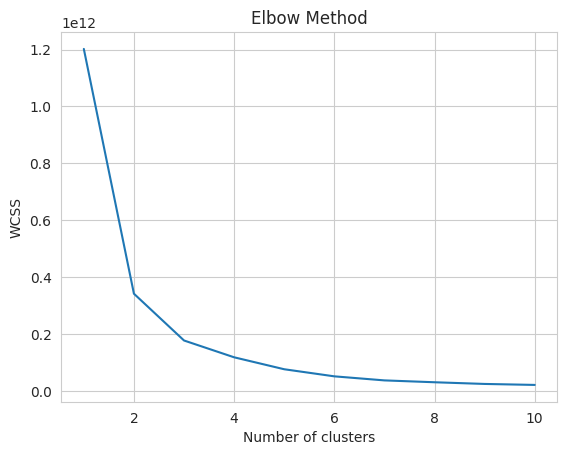

Best number of clusters are  3


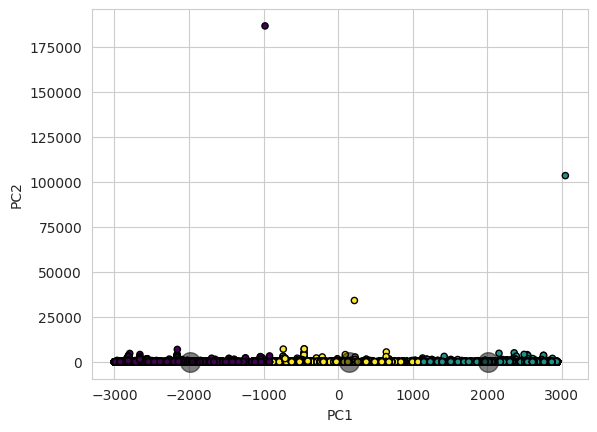

In [ ]:
# Perform clustering on the reduced dimensional data
wcss_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_pca.fit(pca_data)
    wcss_pca.append(kmeans_pca.inertia_)

plt.plot(range(1, 11), wcss_pca)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print("Best number of clusters are ",3)

kmeans_pca1 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca1.fit(pca_data)
labels = kmeans_pca1.labels_

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis',edgecolor='k',s=20)
centers = kmeans_pca1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,edgecolor='k');
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Applying LDA

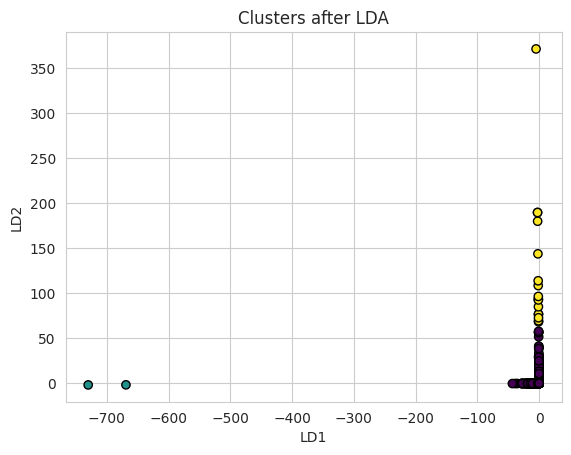

In [ ]:
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Select relevant features for LDA
lda_data = Data[['Quantity', 'UnitPrice', 'CustomerID']]

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(lda_data, Data['CustomerID'])

# Apply KMeans clustering on the transformed data
kmeans_lda = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_lda.fit(X_lda)

# Visualize the clusters
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=kmeans_lda.labels_, cmap='viridis',edgecolor='k')
plt.title('Clusters after LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()
